In [1]:
!pip install kaggle --upgrade

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ohseungju123","key":"a020339099a1161d79cc6c75279a1438"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!ls -1ha kaggle.json

kaggle.json


In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:20<00:00, 42.3MB/s]
100% 812M/812M [00:20<00:00, 40.9MB/s]


In [6]:
!ls

 dogs-vs-cats.zip  'kaggle (1).json'   kaggle.json   sample_data


In [7]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [8]:
!unzip train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [9]:
!unzip test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: t

In [10]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir())

['.config', 'kaggle.json', 'test1', 'dogs-vs-cats.zip', 'test1.zip', 'train.zip', 'train', 'kaggle (1).json', 'sampleSubmission.csv', 'sample_data']


In [11]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [12]:
filenames = os.listdir("/content/train")

In [13]:
filenames

['cat.7131.jpg',
 'cat.5426.jpg',
 'cat.1582.jpg',
 'dog.7638.jpg',
 'cat.7292.jpg',
 'cat.3943.jpg',
 'dog.11279.jpg',
 'cat.4796.jpg',
 'cat.126.jpg',
 'cat.1648.jpg',
 'dog.5447.jpg',
 'dog.8489.jpg',
 'cat.2793.jpg',
 'cat.7089.jpg',
 'cat.9893.jpg',
 'dog.9002.jpg',
 'cat.2353.jpg',
 'dog.9452.jpg',
 'cat.6970.jpg',
 'cat.3868.jpg',
 'dog.7700.jpg',
 'cat.4918.jpg',
 'cat.5895.jpg',
 'dog.4895.jpg',
 'dog.7105.jpg',
 'cat.8321.jpg',
 'dog.10510.jpg',
 'cat.11198.jpg',
 'cat.3199.jpg',
 'dog.4163.jpg',
 'cat.10523.jpg',
 'cat.1312.jpg',
 'dog.5851.jpg',
 'cat.4268.jpg',
 'cat.4787.jpg',
 'dog.12243.jpg',
 'dog.6427.jpg',
 'cat.6941.jpg',
 'dog.3697.jpg',
 'dog.7376.jpg',
 'dog.10702.jpg',
 'cat.10564.jpg',
 'cat.10383.jpg',
 'dog.2335.jpg',
 'dog.7015.jpg',
 'dog.978.jpg',
 'cat.9339.jpg',
 'cat.2013.jpg',
 'cat.4056.jpg',
 'cat.1039.jpg',
 'dog.1549.jpg',
 'dog.1442.jpg',
 'dog.2778.jpg',
 'cat.8670.jpg',
 'cat.907.jpg',
 'cat.5358.jpg',
 'cat.6775.jpg',
 'cat.1694.jpg',
 'cat.324

In [14]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [15]:
df.head()

,filename,category
0,cat.7131.jpg,0
1,cat.5426.jpg,0
2,cat.1582.jpg,0
3,dog.7638.jpg,1
4,cat.7292.jpg,0


<Axes: xlabel='category'>

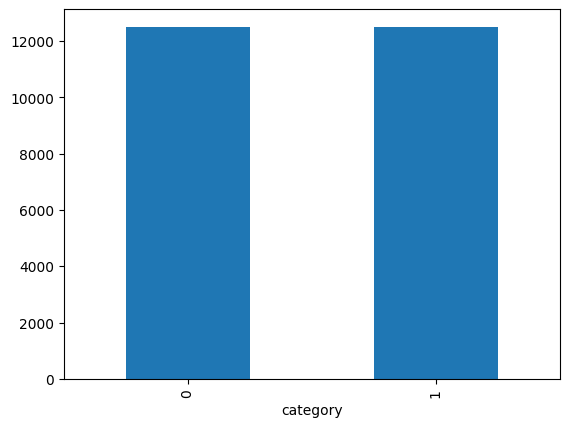

In [16]:
df['category'].value_counts().plot.bar()

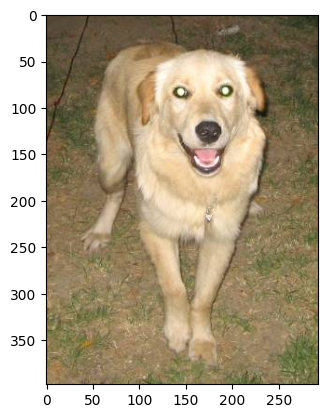

In [17]:
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
earlystop = EarlyStopping(patience=10)

In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [23]:
callbacks = [earlystop, learning_rate_reduction]

In [24]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [25]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [26]:
train_df.head()

,filename,category
0,cat.4772.jpg,cat
1,dog.6562.jpg,dog
2,dog.6718.jpg,dog
3,cat.8732.jpg,cat
4,dog.9918.jpg,dog


In [27]:
validate_df.head()

,filename,category
0,dog.1924.jpg,dog
1,dog.3511.jpg,dog
2,cat.5942.jpg,cat
3,cat.11227.jpg,cat
4,dog.1070.jpg,dog


<Axes: xlabel='category'>

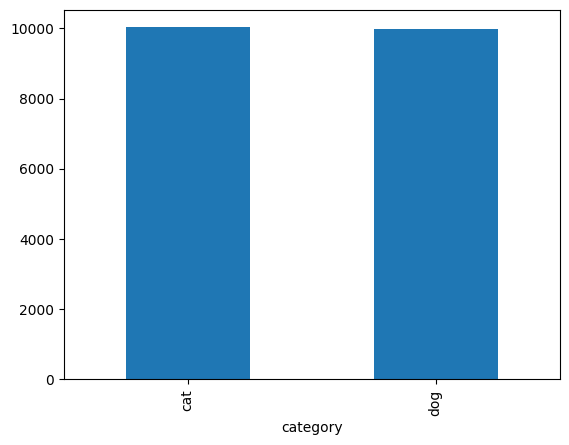

In [28]:
train_df['category'].value_counts().plot.bar()

In [29]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [30]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [31]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [32]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


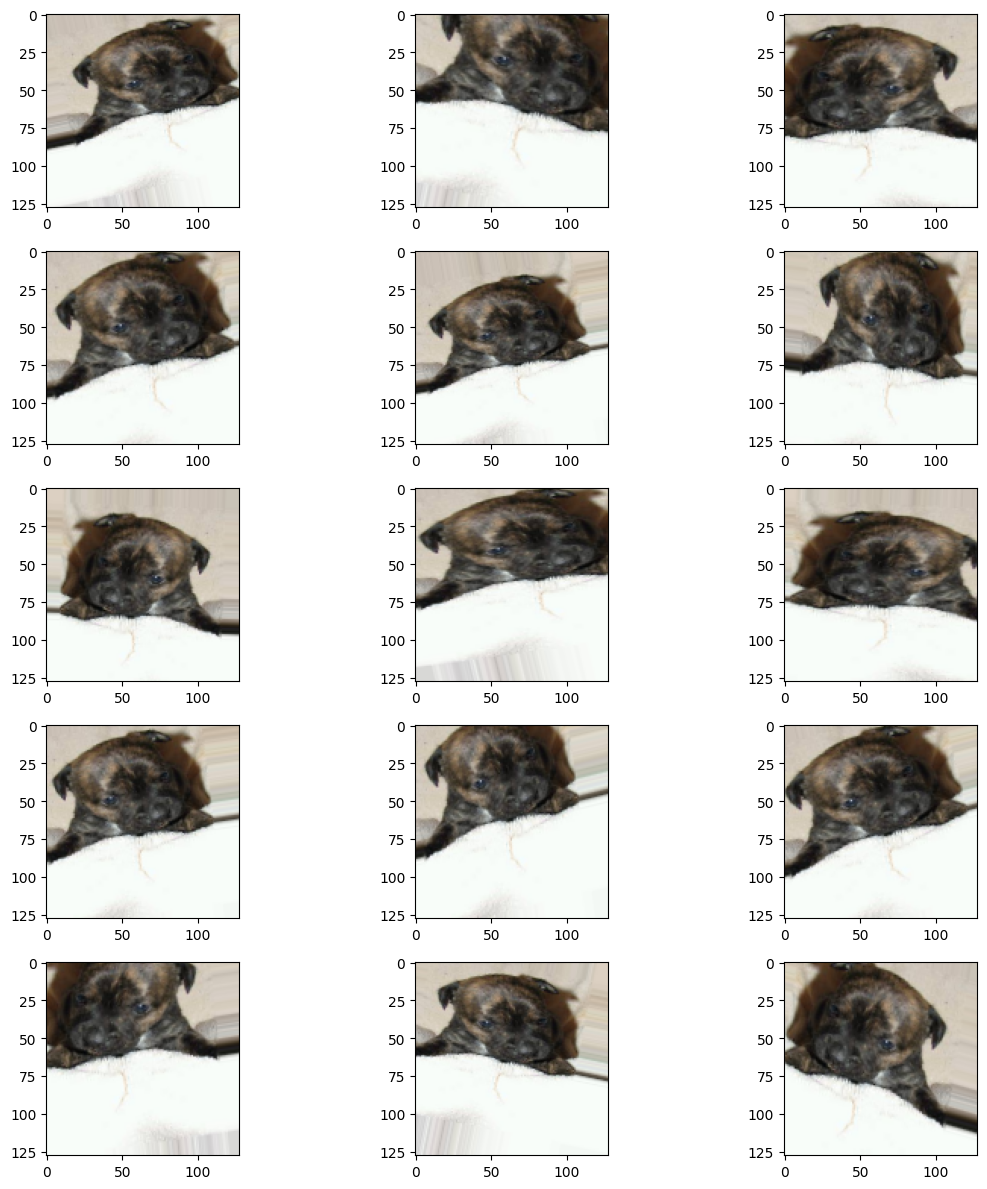

In [33]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [35]:
FAST_RUN = True

In [38]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-38-63cb34b6e89a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/3
1333/1333 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.7342

1333/1333 [==============================] - 173s 130ms/step - loss: 0.5420 - accuracy: 0.7342 - val_loss: 0.8480 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 2/3
1333/1333 [==============================] - ETA: 0s - loss: 0.5093 - accuracy: 0.7524

1333/1333 [==============================] - 161s 121ms/step - loss: 0.5093 - accuracy: 0.7524 - val_loss: 0.4869 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 3/3
1333/1333 [==============================] - ETA: 0s - loss: 0.4704 - accuracy: 0.7798

1333/1333 [==============================] - 155s 116ms/step - loss: 0.4704 - accuracy: 0.7798 - val_loss: 0.8791 - val_accuracy: 0.6961 - lr: 0.0010


epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [39]:
model.save_weights("model.h5")

KeyError: 'acc'

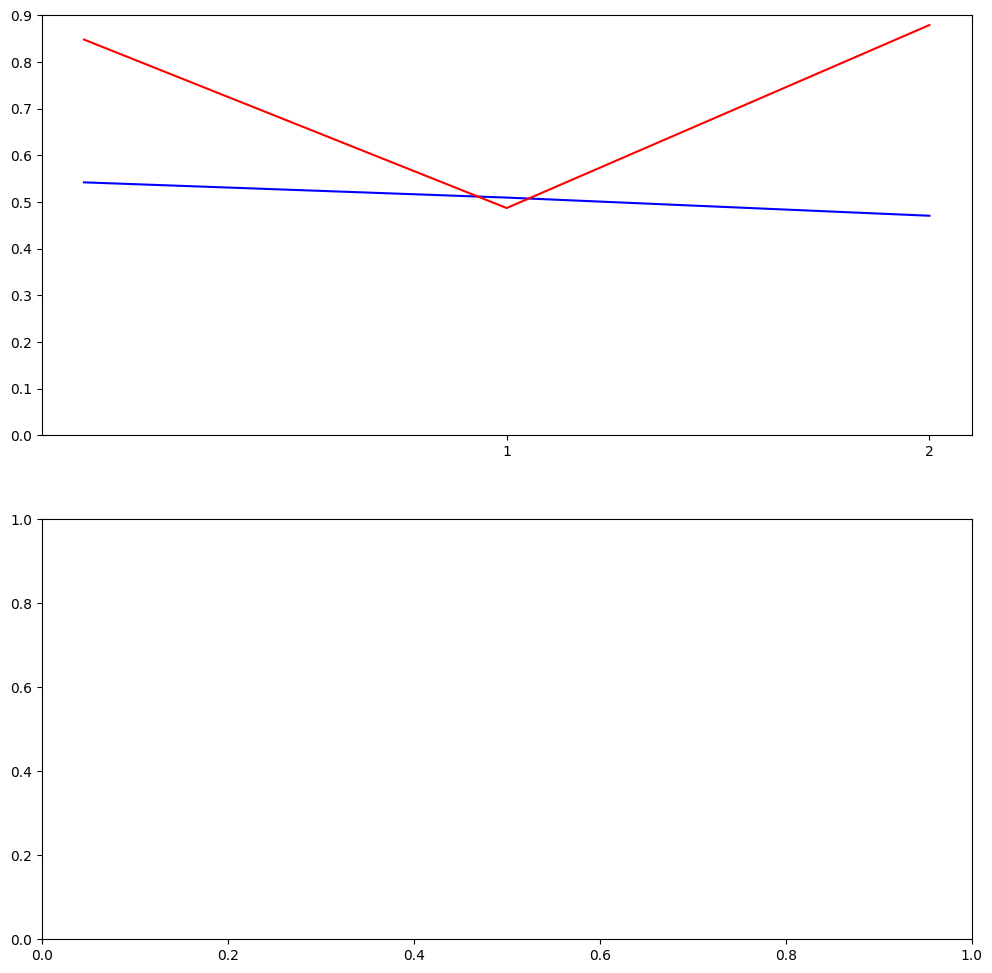

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [41]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [42]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "test1/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [43]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-43-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [44]:
test_df['category'] = np.argmax(predict, axis=-1)

In [45]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [46]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Axes: xlabel='category'>

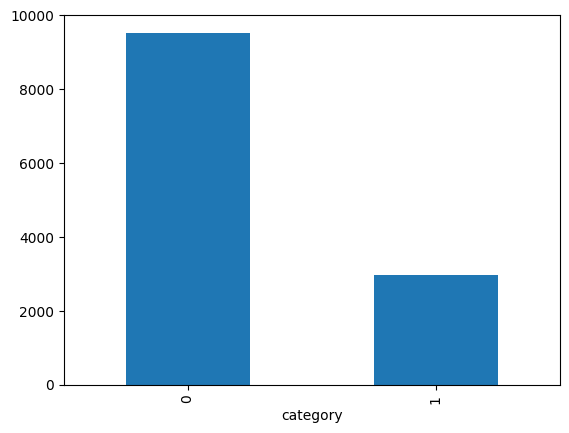

In [47]:
test_df['category'].value_counts().plot.bar()

In [48]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-48-bb74da736158>, line 7)

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)